In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pylab as plt
%matplotlib inline
from scipy import optimize # Usefull to access the docs

from tyssue.core.sheet import Sheet

from tyssue.topology.sheet_topology import cell_division

from tyssue.geometry.sheet_geometry import SheetGeometry as geom
from tyssue.dynamics.sheet_vertex_model import SheetModel as model

from tyssue.solvers.sheet_vertex_solver import Solver as solver
from tyssue.config.json_parser import load_default

from tyssue.dynamics.sheet_isotropic_model import isotropic_relax
from tyssue.draw.vispy_draw import vp_view


from tyssue.draw.mpl_draw import sheet_view
import tyssue.draw.mpl_draw as draw
from tyssue.io import hdf5

multiple roots


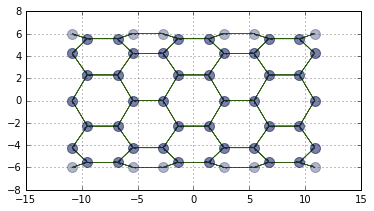

In [2]:
h5store = 'small_hexagonal.hf5'
datasets = hdf5.load_datasets(h5store, data_names=['face', 'vert', 'edge'])
sheet = Sheet('emin', datasets)

sheet.set_geom('sheet')
geom.update_all(sheet)

nondim_specs = load_default('dynamics', 'sheet')
dim_model_specs = model.dimentionalize(nondim_specs)

sheet.set_model('sheet', dim_model_specs)
sheet.grad_norm_factor = sheet.specs['settings']['grad_norm_factor']
sheet.nrj_norm_factor = sheet.specs['settings']['nrj_norm_factor']

isotropic_relax(sheet, nondim_specs)

solver_settings = {
    'minimize': {
        'options': {'disp':True,
        'gtol':1e-4},
        }
    }

live_edge = sheet.upcast_face(sheet.face_df.is_alive).astype(np.bool)
dead_edge = np.logical_not(live_edge)
inactive_verts = set(sheet.edge_df[dead_edge].srce)

active_verts = set(sheet.vert_df.index).difference(inactive_verts)
active_verts = list(active_verts)
sheet.vert_df.is_active = 0
sheet.vert_df.loc[active_verts, 'is_active'] = 1

fig, ax = sheet_view(sheet, ['z', 'x'])

In [3]:
sheet.Nf, sheet.Ne, sheet.Nv

(56, 272, 96)

True


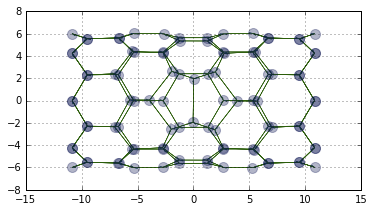

In [4]:

cell_division(sheet, 17, geom)

res = solver.find_energy_min(sheet, geom, model)

print(res['success'])

fig, ax = sheet_view(sheet, ['z', 'x'])

In [5]:
ngen = 3
for n in range(ngen):
    live_cells = np.array(sheet.face_df[sheet.face_df.is_alive==1].index)
    np.random.shuffle(live_cells)
    print('Generation {}: {} cells to devide'
         .format(n, len(live_cells)))
    for cell in live_cells:
        cell_division(sheet, cell, geom, angle=None)
        res = solver.find_energy_min(sheet, geom, model)
        

fig, ax = sheet_view(sheet, ['z', 'x'])

Generation 0: 41 cells to devide
Generation 1: 82 cells to devide


IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
sheet.Nf, sheet.Ne, sheet.Nv

In [ ]:
cell_division(sheet, 23, geom, angle=0)

res = solver.find_energy_min(sheet, geom, model)
print(res['success'])

fig, ax = sheet_view(sheet, ['z', 'x'])

In [ ]:
cell_division(sheet, 15, geom, angle=np.pi/2)

res = solver.find_energy_min(sheet, geom, model)
print(res['success'])

fig, ax = sheet_view(sheet, ['z', 'x'])

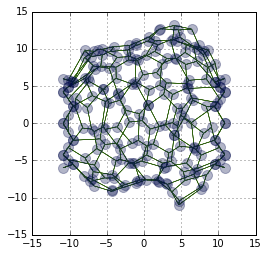

In [6]:
fig, ax = sheet_view(sheet, ['z', 'y'])

In [7]:

vp_view(sheet)

/home/guillaume/anaconda3/envs/py35/lib/python3.5/site-packages/IPython/config.py:13: ShimWarning: The `IPython.config` package has been deprecated. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)
